# Homework-1

I am going to build a quantum circuit that can be able to calculate 1+2 = 3 .  To do that I am going to use [IBM Quantum Lab ](https://quantum-computing.ibm.com/lab) . 

We are going to use Full Adder to perform our calculation.  The codes are taken from [Qiskit.org ](https://qiskit.org/textbook/ch-states/atoms-computation.html). 

We could just use half adder but it will not be abble to produce the carry on bit which is why we must use full adder to get both sum and carry on 

To calculate , we need to use 3 qibit as  our nput qbit ( first one for 1 and rest for 2 )  and 2 qibits as output qubits. and 5 classical bits for measurement. 

First we do our necessary imports as follows :  Quantum registers, Classical register and Quantum circuit, numpy etc.

In [33]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-25 03:39:29,293: Credentials are already in use. The existing account in the session will be replaced.


We load the IBMQ account ( We do not need it while we are using the IBM quntum Lab, but we will be needed it when we run this .ipynb file remotely.)

In [34]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

ibmqfactory.load_account:WARNING:2021-11-25 03:39:31,384: Credentials are already in use. The existing account in the session will be replaced.


I am going to use  5 quantum register and 3 classical register.

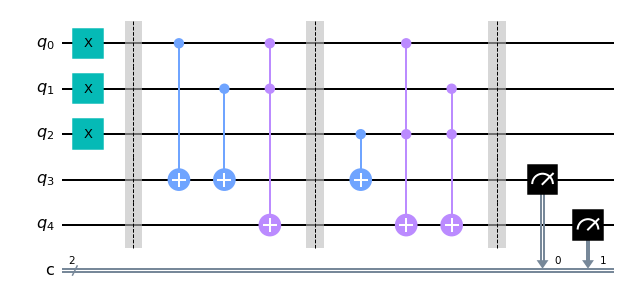

In [35]:
qc_ha = QuantumCircuit(5,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.x(2)
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,3)
qc_ha.cx(1,3)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,4)
qc_ha.barrier()


qc_ha.cx(2,3)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,2,4)
qc_ha.ccx(1,2,4)
qc_ha.barrier()
# extract outputs
qc_ha.measure(3,0) # extract XOR value
qc_ha.measure(4,1) # extract AND value

qc_ha.draw()